In [10]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
import pandas
from sklearn.model_selection import train_test_split

In [11]:
# Load the MNIST dataset
mnist = fetch_openml('mnist_784', version=1)

# Convert the pixel values to binary values
threshold = 128
binary_mnist = np.where(mnist.data >= threshold, 1, 0)

# Assign all the data to the training set
X_train, y_train = binary_mnist, mnist.target


/Users/tern/miniconda/lib/python3.10/site-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [13]:
y_train[0]

'5'

In [14]:
def my_softmax(z):  
    """ Softmax converts a vector of values to a probability distribution.
    Args:
      z (ndarray (N,))  : input data, N features
    Returns:
      a (ndarray (N,))  : softmax of z
    """    
    
    N = len(z)
    # dont have this line of code and it will say index out of bounds
    a = np.zeros(N)

    for j in range(N):
        acc = 0
        for k in range(N):
            acc += np.exp(z[k])
        a[j] = (np.exp(z[j]))/acc
    
    return a

In [15]:
z = np.array([1., 2., 3., 4.])
a = my_softmax(z)
atf = tf.nn.softmax(z)
print(f"my_softmax(z):         {a}")
print(f"tensorflow softmax(z): {atf}")



Metal device set to: Apple M1
my_softmax(z):         [0.0320586  0.08714432 0.23688282 0.64391426]
tensorflow softmax(z): [0.0320586  0.08714432 0.23688282 0.64391426]


In [17]:
print ('The shape of X is: ' + str(X_train.shape))
print ('The shape of y is: ' + str(y_train.shape))

The shape of X is: (70000, 784)
The shape of y is: (70000,)


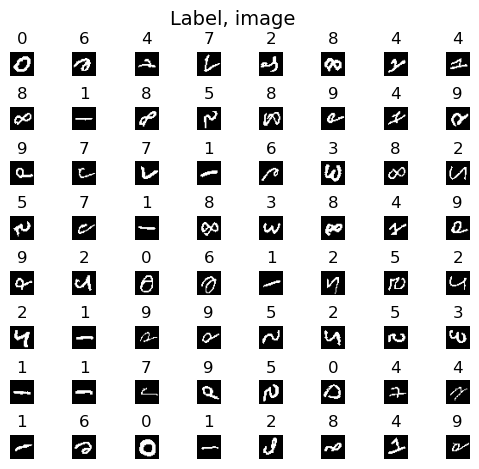

In [20]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
# You do not need to modify anything in this cell

m, n = X_train.shape

fig, axes = plt.subplots(8,8, figsize=(5,5))
fig.tight_layout(pad=0.13,rect=[0, 0.03, 1, 0.91]) #[left, bottom, right, top]

#fig.tight_layout(pad=0.5)

for i,ax in enumerate(axes.flat):
    # Select random indices
    random_index = np.random.randint(m)
    
    # Select rows corresponding to the random indices and
    # reshape the image
    X_random_reshaped = X_train[random_index].reshape((28,28)).T
    
    # Display the image
    ax.imshow(X_random_reshaped, cmap='gray')
    
    # Display the label above the image
    ax.set_title(y_train[random_index])
    ax.set_axis_off()
    fig.suptitle("Label, image", fontsize=14)

In [21]:
from tensorflow.keras import layers
tf.random.set_seed(1234) # for consistent results
model = Sequential(
    [               

        tf.keras.Input(shape=(784,)),
        layers.Dense(25, activation="relu", name="layer1"),
        layers.Dense(15, activation="relu", name="layer2"),
        layers.Dense(10, activation="linear", name="layer3"),
        
    ], name = "my_model" 
)


In [22]:
model.summary()

Model: "my_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer1 (Dense)              (None, 25)                19625     
                                                                 
 layer2 (Dense)              (None, 15)                390       
                                                                 
 layer3 (Dense)              (None, 10)                160       
                                                                 
Total params: 20,175
Trainable params: 20,175
Non-trainable params: 0
_________________________________________________________________


In [23]:
[layer1, layer2, layer3] = model.layers

In [24]:
#### Examine Weights shapes
W1,b1 = layer1.get_weights()
W2,b2 = layer2.get_weights()
W3,b3 = layer3.get_weights()
print(f"W1 shape = {W1.shape}, b1 shape = {b1.shape}")
print(f"W2 shape = {W2.shape}, b2 shape = {b2.shape}")
print(f"W3 shape = {W3.shape}, b3 shape = {b3.shape}")

W1 shape = (784, 25), b1 shape = (25,)
W2 shape = (25, 15), b2 shape = (15,)
W3 shape = (15, 10), b3 shape = (10,)


In [26]:
y_train = y_train.astype(int)

model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
)

history = model.fit(
    X_train,y_train,
    epochs=40
)

Epoch 1/40
2188/2188 [==============================] - 11s 4ms/step - loss: 0.3902
Epoch 2/40
2188/2188 [==============================] - 9s 4ms/step - loss: 0.1952
Epoch 3/40
2188/2188 [==============================] - 9s 4ms/step - loss: 0.1565
Epoch 4/40
2188/2188 [==============================] - 9s 4ms/step - loss: 0.1334
Epoch 5/40
2188/2188 [==============================] - 9s 4ms/step - loss: 0.1185
Epoch 6/40
2188/2188 [==============================] - 9s 4ms/step - loss: 0.1065
Epoch 7/40
2188/2188 [==============================] - 9s 4ms/step - loss: 0.0990
Epoch 8/40
2188/2188 [==============================] - 9s 4ms/step - loss: 0.0902
Epoch 9/40
2188/2188 [==============================] - 9s 4ms/step - loss: 0.0849
Epoch 10/40
2188/2188 [==============================] - 9s 4ms/step - loss: 0.0800
Epoch 11/40
2188/2188 [==============================] - 9s 4ms/step - loss: 0.0763
Epoch 12/40
2188/2188 [==============================] - 9s 4ms/step - loss: 0.0710


In [31]:
image_of_two = X_train[1015]


prediction = model.predict(image_of_two.reshape(1,784))  # prediction

print(f" predicting a Zero: \n{prediction}")
print(f" Largest Prediction index: {np.argmax(prediction)}")

1/1 [==============================] - 0s 18ms/step
 predicting a Zero: 
[[  5.2084613  -15.97689     -6.247063   -17.091404    -4.2040086
    1.20659     -0.83653617 -16.981594    -5.3419213   -8.648479  ]]
 Largest Prediction index: 0


In [33]:
prediction_p = tf.nn.softmax(prediction)

print(f" predicting a Zero. Probability vector: \n{prediction_p}")
print(f"Total of predictions: {np.sum(prediction_p):0.3f}")

 predicting a Zero. Probability vector: 
[[9.7965211e-01 6.1715083e-10 1.0375300e-05 2.0247121e-10 8.0036494e-05
  1.7909411e-02 2.3214691e-03 2.2597095e-10 2.5650685e-05 9.3989354e-07]]
Total of predictions: 1.000


In [34]:
yhat = np.argmax(prediction_p)

print(f"np.argmax(prediction_p): {yhat}")

np.argmax(prediction_p): 0


1/1 [==============================] - 0s 9ms/step


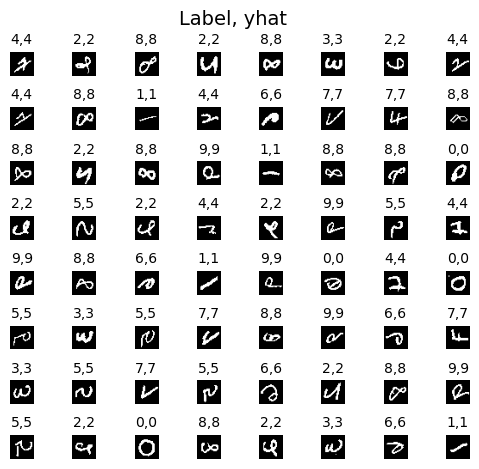

In [36]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
# You do not need to modify anything in this cell

m, n = X_train.shape

fig, axes = plt.subplots(8,8, figsize=(5,5))
fig.tight_layout(pad=0.13,rect=[0, 0.03, 1, 0.91]) #[left, bottom, right, top]

for i,ax in enumerate(axes.flat):
    # Select random indices
    random_index = np.random.randint(m)
    
    # Select rows corresponding to the random indices and
    # reshape the image
    X_random_reshaped = X_train[random_index].reshape((28,28)).T
    
    # Display the image
    ax.imshow(X_random_reshaped, cmap='gray')
    
    # Predict using the Neural Network
    prediction = model.predict(X_train[random_index].reshape(1,784))
    prediction_p = tf.nn.softmax(prediction)
    yhat = np.argmax(prediction_p)
    
    # Display the label above the image
    ax.set_title(f"{y_train[random_index]},{yhat}",fontsize=10)
    ax.set_axis_off()
fig.suptitle("Label, yhat", fontsize=14)
plt.show()